In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



from sklearn.model_selection import train_test_split



from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error


from  datetime import datetime, timedelta, date

In [49]:
!pip3 install pmdarima


     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 2.1MB 8.6MB/s 
     |████████████████████████████████| 8.7MB 20.8MB/s 
     |████████████████████████████████| 808kB 48.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
INPUT_PARIS='/content/drive/My Drive/Colab Notebooks/Bike_sharing/challenge/part_1/paris/stations/'


In [238]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [239]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/challenge/part_1/paris/master_final.csv')

# Changing the type allow to keep the Ram low and speed a little but the running time
# Every varibales is is changed with the right type (~ memory) 
df['bikes']=df['bikes'].astype('float16') 


df['pressure']=df['pressure'].astype('float16')
df['temperature']=df['temperature'].astype('float16')
df['wind']=df['wind'].astype('float16')
df['altitude']=df['altitude'].astype('float16')

df['lag_beau_temps']=df['lag_beau_temps'].astype('float16')
df['lag_nuageux']=df['lag_nuageux'].astype('float16')
df['lag_pluvieux']=df['lag_pluvieux'].astype('float16')
df['lag_orage']=df['lag_orage'].astype('float16')
df['lag_30m']=df['lag_30m'].astype('float16')
df['lag_7j']=df['lag_7j'].astype('float16')


df['station']=df['station'].astype('int8')
df['clouds']=df['clouds'].astype('int8')
df['humidity']=df['humidity'].astype('int8')
df['pressure']=df['pressure'].astype('int16')


df['beau_temps']=df['beau_temps'].astype('int8')
df['nuageux']=df['nuageux'].astype('int8')
df['pluvieux']=df['pluvieux'].astype('int8')
df['pluie']=df['pluie'].astype('int8')
df['orage']=df['orage'].astype('int8')


df['hour']=df['hour'].astype('int8')
df['day']=df['day'].astype('int8')
df['month']=df['month'].astype('int8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10340547 entries, 0 to 10340546
Data columns (total 25 columns):
 #   Column          Dtype  
---  ------          -----  
 0   datetime        object 
 1   bikes           float16
 2   station         int8   
 3   clouds          int8   
 4   humidity        int8   
 5   pressure        int16  
 6   temperature     float16
 7   wind            float16
 8   altitude        float16
 9   beau_temps      int8   
 10  nuageux         int8   
 11  pluvieux        int8   
 12  pluie           int8   
 13  orage           int8   
 14  lag_beau_temps  float16
 15  lag_nuageux     float16
 16  lag_pluvieux    float16
 17  lag_pluie       float64
 18  lag_orage       float16
 19  hour            int8   
 20  day             int8   
 21  month           int8   
 22  weekday         int64  
 23  lag_30m         float16
 24  lag_7j          float16
dtypes: float16(10), float64(1), int16(1), int64(1), int8(11), object(1)
memory usage: 562.1+ MB


In [240]:
# Drop some useless columns that can slow the algortithm and are colorate 

drop_cols=['lag_pluvieux','pluvieux','wind']
df=df.drop(drop_cols, axis=1)

df = df.set_index('datetime')

In [241]:
df=df[10300547:]

# Stationary Test  - SARIMAX


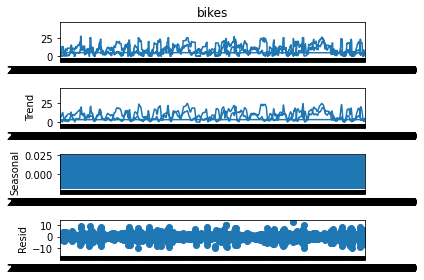

In [242]:
import statsmodels.api as sm


seas_d=sm.tsa.seasonal_decompose(df['bikes'][:10000],freq=7);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

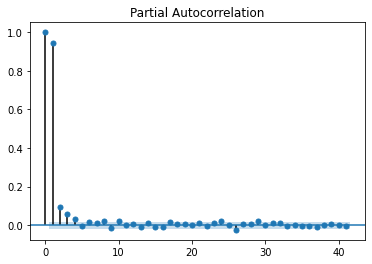

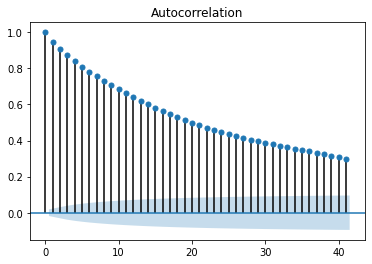

In [7]:
plot_pacf(df['bikes']);
plot_acf(df['bikes']);

Partial autocorelation a un pike a lag 1 et lag 2, ce qui signifie que toutes les autocorrélations d'ordre supérieur sont effectivement expliquées par l'autocorrélation lag-1 et lag-2.

In [243]:
ad_fuller_result = adfuller(df['bikes'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')



ADF Statistic: -12.708019482576505
p-value: 1.0448020903122442e-23


In [244]:
res = sm.tsa.adfuller(df['bikes'],regression='c', autolag='AIC')
print('p-value:{} avec regression constant only (default)'.format(res[1]))
res = sm.tsa.adfuller(df['bikes'],regression='ct', autolag='AIC')
print('p-value:{} avec regression constant and trend'.format(res[1]))

res = sm.tsa.adfuller(df['bikes'],regression='ctt', autolag='AIC')
print('p-value:{} avec regression constant, and linear and quadratic trend'.format(res[1]))


res = sm.tsa.adfuller(df['bikes'],regression='nc', autolag='AIC')
print('p-value:{} avec regression nc'.format(res[1]))


p-value:1.0448020903122442e-23 avec regression constant only (default)
p-value:2.4302637432901568e-20 avec regression constant and trend
p-value:1.7918517474029368e-21 avec regression constant, and linear and quadratic trend
p-value:1.331471814356739e-10 avec regression nc


In [245]:
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)


y_test=df["bikes"].dropna()
test_adf(y_test, " bike demand")


Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary  bike demand


la valeur de p-value est assez faible pour dire qu'elle esst stationnaire 


In [235]:
#df=df.drop(['moment'], axis=1)
#df=df.set_index('datetime')
#df=df.drop_duplicates()
y = df['bikes']
X= df.drop(['bikes'], axis=1)
train_size=int(len(df) *0.7)
test_size = int(len(df)) - train_size
test_size = test_size+1

print(train_size)
print(test_size)
X_train, y_train = X[:train_size].dropna(), y[:train_size].dropna()
X_test, y_test = X[train_size:].dropna(), y[train_size:].dropna()

7238382
3102166


In [236]:
import gc 
del df
gc.collect()

0

In [14]:
# Fins the best order

from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train, 
                     exogenous= X_train,
                     start_p=1, start_q=1, 
                     max_p=7, max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True
                     )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=121193.703, Time=170.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=121420.320, Time=31.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=121408.528, Time=96.58 sec


KeyboardInterrupt: ignored

In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7000
Model:               SARIMAX(4, 1, 1)   Log Likelihood                9259.508
Date:                Thu, 08 Oct 2020   AIC                         -18505.017
Time:                        15:22:05   BIC                         -18457.042
Sample:                             0   HQIC                        -18488.485
                               - 7000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spaces        -0.9978      0.001  -1021.473      0.000      -1.000      -0.996
ar.L1          0.3970      0.037     10.752      0.000       0.325       0.469
ar.L2          0.1173      0.015      7.823      0.000       0.088       0.147
ar.L3         -0.0348      0.009     -3.846      0.000      -0.053      -0.017
ar.L4          0.0473      0.009      5.043      0.000       0.029       0.066
ma.L1         -0.7930      0.037    -21.462      0.000      -0.865      -0.721
sigma2         0.0042   7.99e-06    519.780      0.000       0.004       0.004
===================================================================================
Ljung-Box (Q):                       46.38   Jarque-Bera (JB):          12225155.80
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                            -6.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       207.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
import itertools
p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1], x[2], 7 )   for x in list(itertools.product(p,d,q))]


print('Sarimax {},{}'.format(pdq[1], seasonal_pdq[1]))
print('Sarimax {},{}'.format(pdq[1], seasonal_pdq[2]))
print('Sarimax {},{}'.format(pdq[2], seasonal_pdq[3]))
print('Sarimax {},{}'.format(pdq[2], seasonal_pdq[4]))


Sarimax (0, 0, 1),(0, 0, 1, 7)
Sarimax (0, 0, 1),(0, 1, 0, 7)
Sarimax (0, 1, 0),(0, 1, 1, 7)
Sarimax (0, 1, 0),(1, 0, 0, 7)


In [47]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
  for param_seasonal in seasonal_pdq:
    model= SARIMAX(y_train,
                    order=param,
                    seasonal_order=param_seasonal,
                    enforce_stationary=False,
                    enforce_invertibility=False)
    results=model.fit()

    print('Sarimax{}x{}-AIC: {}'.format(param,param_seasonal,results.aic))




Sarima(0, 0, 0)x(0, 0, 0, 7)-AIC: nan
Sarima(0, 0, 0)x(0, 0, 1, 7)-AIC: 210136.36156404324
Sarima(0, 0, 0)x(0, 1, 0, 7)-AIC: nan
Sarima(0, 0, 0)x(0, 1, 1, 7)-AIC: 177697.2103755064
Sarima(0, 0, 0)x(1, 0, 0, 7)-AIC: 177444.20925416535
Sarima(0, 0, 0)x(1, 0, 1, 7)-AIC: 177109.39886305796
Sarima(0, 0, 0)x(1, 1, 0, 7)-AIC: 177870.45045842376
Sarima(0, 0, 0)x(1, 1, 1, 7)-AIC: 174905.38040936305
Sarima(0, 0, 1)x(0, 0, 0, 7)-AIC: 201395.49698909663
Sarima(0, 0, 1)x(0, 0, 1, 7)-AIC: 183305.13324328762
Sarima(0, 0, 1)x(0, 1, 0, 7)-AIC: 156970.61620164016
Sarima(0, 0, 1)x(0, 1, 1, 7)-AIC: 154430.23251321985
Sarima(0, 0, 1)x(1, 0, 0, 7)-AIC: 155794.6006979498
Sarima(0, 0, 1)x(1, 0, 1, 7)-AIC: 154059.02557403338
Sarima(0, 0, 1)x(1, 1, 0, 7)-AIC: 155345.44062616426
Sarima(0, 0, 1)x(1, 1, 1, 7)-AIC: 152168.21354951424
Sarima(0, 1, 0)x(0, 0, 0, 7)-AIC: nan
Sarima(0, 1, 0)x(0, 0, 1, 7)-AIC: 122099.5210022851
Sarima(0, 1, 0)x(0, 1, 0, 7)-AIC: nan
Sarima(0, 1, 0)x(0, 1, 1, 7)-AIC: 122162.10243274292
Sar

In [289]:
model= SARIMAX(endog=y_train, 
 exog=X_train,
 order=(1,1,1),
 seasonal_order=(1,0,0,7),

 enforce_invertibility=True, enforce_stationarity=True
 )

In [290]:
results= model.fit()

In [291]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  bikes   No. Observations:                 6297
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -8496.350
Date:                Wed, 28 Oct 2020   AIC                          17008.700
Time:                        18:29:08   BIC                          17062.682
Sample:                    04-01-2016   HQIC                         17027.401
                         - 08-10-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hour           0.0080      0.002      4.827      0.000       0.005       0.011
day           -0.0007      0.001     -0.546      0.585      -0.003       0.002
month          0.0080      0.006      1.368      0.171      -0.003       0.019
weekday       -0.0006      0.006     -0.103      0.918      -0.012       0.011
lag_30m        0.9298      0.004    223.335      0.000       0.922       0.938
lag_7j         0.0040      0.005      0.841      0.400      -0.005       0.013
ar.L1          0.0356      0.009      4.098      0.000       0.019       0.053
sigma2         0.8699      0.007    123.218      0.000       0.856       0.884
===================================================================================
Ljung-Box (Q):                       80.82   Jarque-Bera (JB):             27938.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

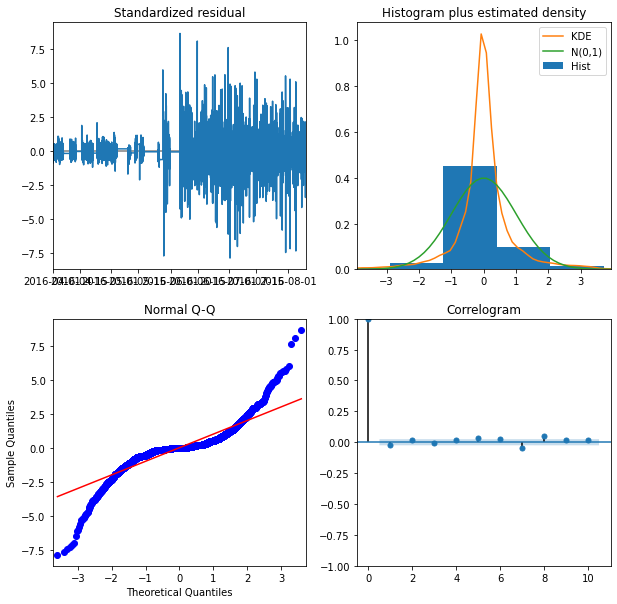

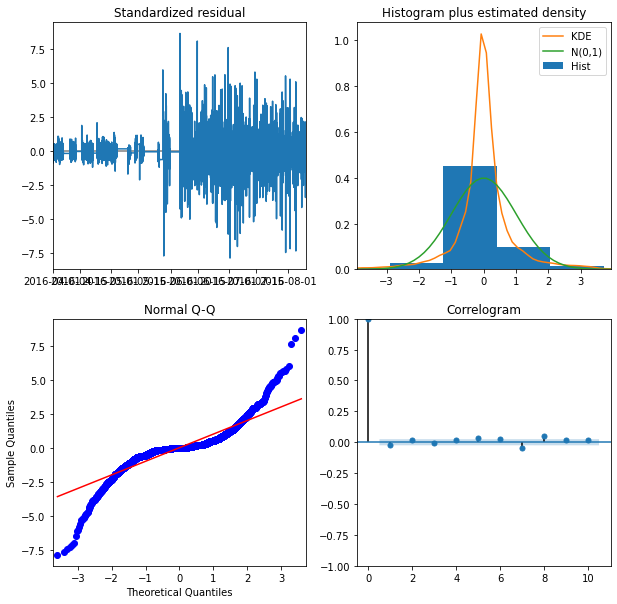

In [ ]:
results.plot_diagnostics(figsize=(10, 10))

In [17]:
steps=-1
#predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=X_test)  
pred_Arima= results.predict(start ='2016-08-10 04:30:00', end='2016-10-05 09:30:00',exog=X_test)  

In [226]:
forecast_1= results.forecast(steps=test_size-1, exog=X_test)
len(forecast_1)

12000

In [227]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(( y_true.mean() - y_pred.mean() ) / y_true.mean() )) * 100
mean_absolute_percentage_error(np.array(y_test[:168]) , np.array(forecast_1[:168])) 

39.17276491621798

In [228]:
from statsmodels.tools.eval_measures import meanabs
error=meanabs(np.array(forecast_1[:168]), np.array(y_test[:168]))
error

2.359582405033693

In [229]:
predictions=pd.DataFrame(forecast_1)
predictions=predictions.reset_index()
predictions['True'] =  y_test.reset_index(drop=True)

predictions=predictions.rename(columns={0:'pred'})


In [231]:
#predictions=predictions.set_index('datetime')
predictions

,index,pred,True
0,28000,0.950412,1.0
1,28001,1.030619,1.0
2,28002,1.047742,2.0
3,28003,1.721116,3.0
4,28004,2.196499,3.0
...,...,...,...
11995,39995,-23.140233,3.0
11996,39996,-23.124738,2.0
11997,39997,-23.581117,2.0
11998,39998,-23.597496,2.0


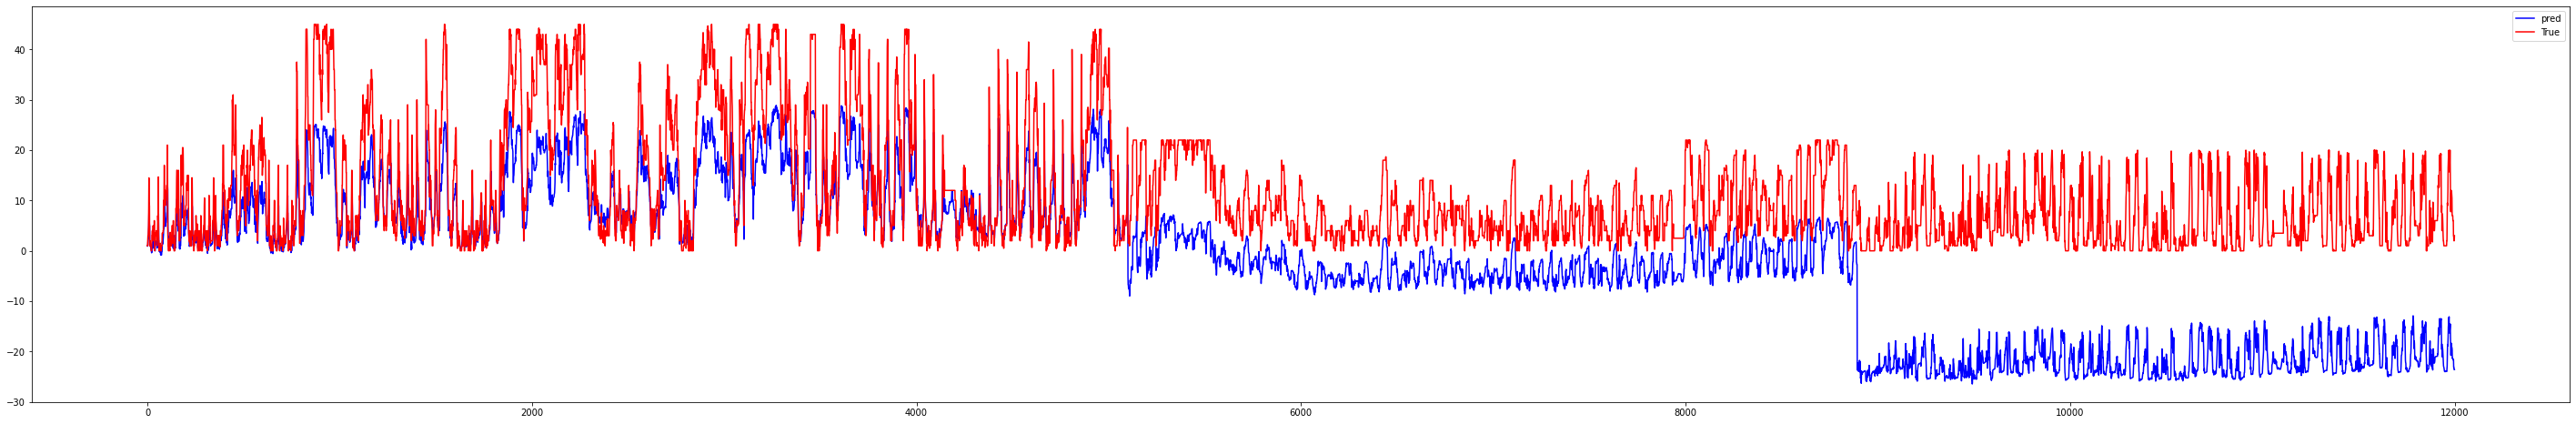

In [232]:
ax = predictions['pred'].plot(figsize=(50,8), legend=True, color='blue')
predictions['True'].plot(legend=True, color='red', figsize=(50,8))

In [246]:
def create_df():
  INPUT_PARIS='/content/drive/My Drive/Colab Notebooks/Bike_sharing/challenge/part_1/paris/stations/'
  df=pd.read_csv(INPUT_PARIS+'09037-clichy-parme.csv' ,parse_dates=True)
  df['datetime']=pd.to_datetime(df['moment'])
  df=df.drop(['moment', 'spaces'], axis=1)
  return df

def create_date_features(df):
  df['hour']=df['datetime'].dt.hour
  df['day']=df['datetime'].dt.day
  df['month']=df['datetime'].dt.month
  df['weekday']=df['datetime'].dt.weekday

  df['lag_30m']= df['bikes'].shift(1)
  df['lag_7j']=df['bikes'].shift(24*7)
  return df


def clean_data(df):
  df=df.set_index('datetime')
  df = df.resample('30min').mean()
  df = df.reset_index()
  return df

def fillna(df):
  df=df.fillna(method='ffill')
  df=df.fillna(method='bfill')
  return df

In [247]:
df = create_df()
df = clean_data(df)
df = fillna(df)
df =  create_date_features(df)
df = fillna(df)
df = df.set_index('datetime')

In [248]:
y = df['bikes']
X= df.drop(['bikes'], axis=1)
train_size=int(len(df) *0.7)
test_size = int(len(df)) - train_size
test_size = test_size+1

print(train_size)
print(test_size)
X_train, y_train = X[:train_size].dropna(), y[:train_size].dropna()
X_test, y_test = X[train_size:].dropna(), y[train_size:].dropna()


6297
2700


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8996 entries, 2016-04-01 00:00:00 to 2016-10-05 09:30:00
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bikes    8996 non-null   float64
 1   hour     8996 non-null   int64  
 2   day      8996 non-null   int64  
 3   month    8996 non-null   int64  
 4   weekday  8996 non-null   int64  
 5   lag_30m  8996 non-null   float64
 6   lag_7j   8996 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 562.2 KB


In [292]:
model= SARIMAX(endog=y_train, 
 exog=X_train,
 #order=(1,1,1),
 #seasonal_order=(1,0,0,7),

 enforce_invertibility=True, enforce_stationarity=True
 )
resulat= model.fit()

In [294]:
resulat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  bikes   No. Observations:                 6297
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -8496.350
Date:                Wed, 28 Oct 2020   AIC                          17008.700
Time:                        18:30:16   BIC                          17062.682
Sample:                    04-01-2016   HQIC                         17027.401
                         - 08-10-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hour           0.0080      0.002      4.827      0.000       0.005       0.011
day           -0.0007      0.001     -0.546      0.585      -0.003       0.002
month          0.0080      0.006      1.368      0.171      -0.003       0.019
weekday       -0.0006      0.006     -0.103      0.918      -0.012       0.011
lag_30m        0.9298      0.004    223.335      0.000       0.922       0.938
lag_7j         0.0040      0.005      0.841      0.400      -0.005       0.013
ar.L1          0.0356      0.009      4.098      0.000       0.019       0.053
sigma2         0.8699      0.007    123.218      0.000       0.856       0.884
===================================================================================
Ljung-Box (Q):                       80.82   Jarque-Bera (JB):             27938.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [296]:
forecast_1= resulat.forecast(steps=test_size-1, exog=X_test)


In [304]:
MAPE=mean_absolute_percentage_error(np.array(y_test[:2699]) , np.array(forecast_1[:2699]))
print('MAPE error over 2700 values is :',MAPE)

error=meanabs(np.array(forecast_1[:2699]), np.array(y_test[:2699]))
print('MAE error over 2700 values is :',error)


MAPE error over 2700 values is : 0.6392873008973426
MAE error over 2700 values is : 0.6441520424405696


In [305]:
MAPE=mean_absolute_percentage_error(np.array(y_test[:1000]) , np.array(forecast_1[:1000]))
print('MAPE error over 1000 first values is :',MAPE)

error=meanabs(np.array(forecast_1[:1000]), np.array(y_test[:1000]))
print('MAE error over 1000 first values is :',error)

MAPE error over 1000 first values is : 1.9890839574179247
MAE error over 1000 first values is : 0.5509331507244135


In [306]:
MAPE=mean_absolute_percentage_error(np.array(y_test[1500:]) , np.array(forecast_1[1500:]))
print('MAPE error over 1000 last values is :',MAPE)

error=meanabs(np.array(forecast_1[1500:]), np.array(y_test[1500:]))
print('MAE error over 1000 last values is :',error)

MAPE error over 1000 last values is : 0.5683483570695279
MAE error over 1000 last values is : 0.7095697371992487


In [307]:
predictions=pd.DataFrame(forecast_1)
predictions=predictions.reset_index()
predictions['True'] =  y_test.reset_index(drop=True)

predictions=predictions.rename(columns={0:'pred'})


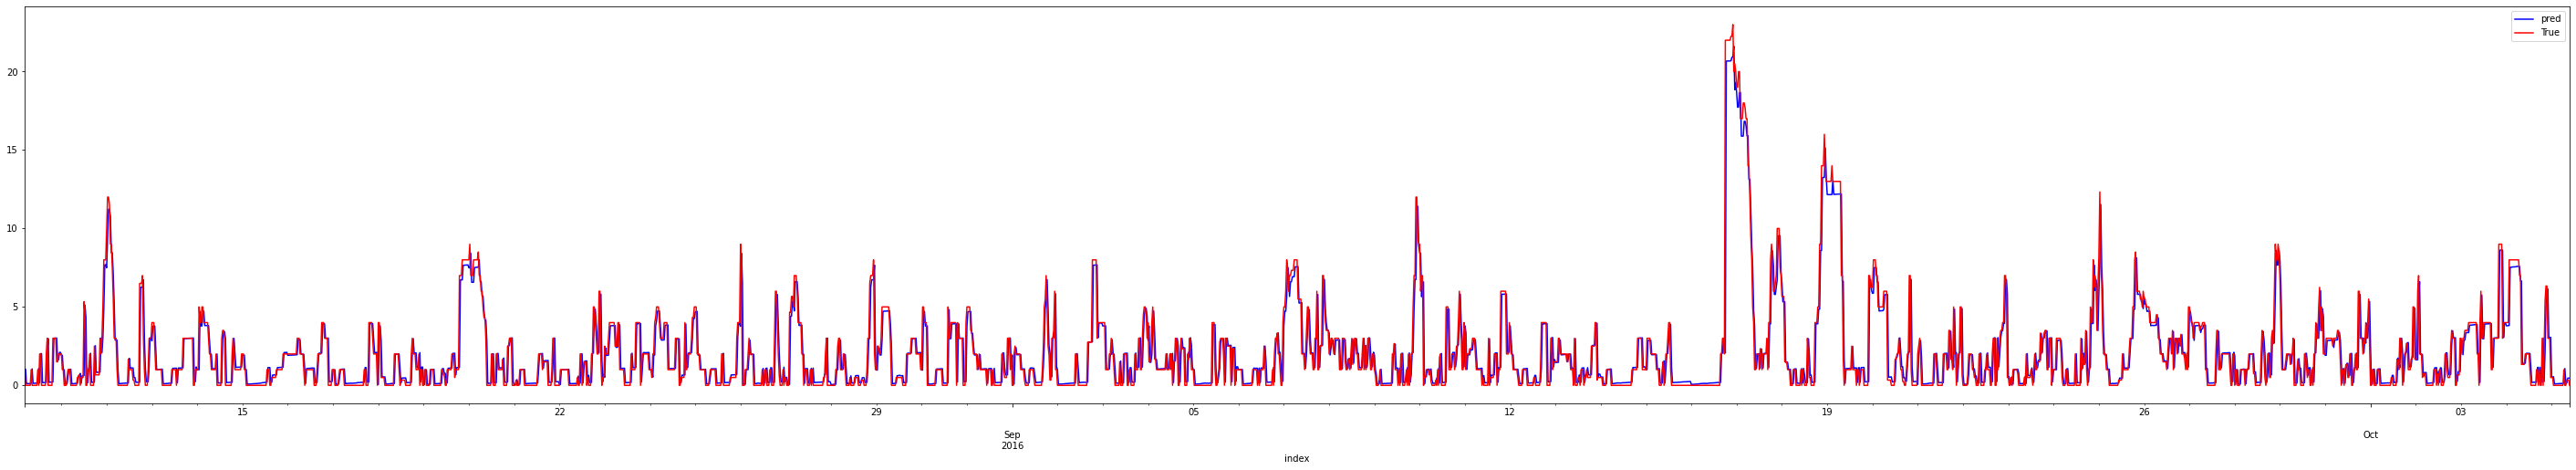

In [308]:
predictions = predictions.set_index('index')
ax = predictions['pred'].plot(figsize=(50,8), legend=True, color='blue')
predictions['True'].plot(legend=True, color='red', figsize=(50,8))

In [302]:
predictions

,pred,True
index,,
2016-08-10 04:30:00,1.021121,1.000000
2016-08-10 05:00:00,1.031733,0.000000
2016-08-10 05:30:00,0.101923,0.000000
2016-08-10 06:00:00,0.109933,0.000000
2016-08-10 06:30:00,0.109933,0.000000
...,...,...
2016-10-05 07:30:00,0.141880,0.000000
2016-10-05 08:00:00,0.143244,0.333333
2016-10-05 08:30:00,0.453187,0.333333
